In [1]:
# Install statements
# install.packages(c("remotes","pROC","naivebayes"))
# remotes::install_github("jtextor/bayesianNetworks")
# install.packages("bnlearn")
# install.packages("dagitty")
# install.packages("lavaan")

In [2]:
# Packages
library( bayesianNetworks )
library( naivebayes )
library( bnlearn )
library( dagitty )
library( lavaan )

Warning message:
"package 'naivebayes' was built under R version 3.6.3"naivebayes 0.9.7 loaded
Warning message:
"package 'bnlearn' was built under R version 3.6.3"Warning message:
"package 'dagitty' was built under R version 3.6.3"
Attaching package: 'dagitty'

The following objects are masked from 'package:bnlearn':

    ancestors, children, descendants, parents, spouses

Warning message:
"package 'lavaan' was built under R version 3.6.3"This is lavaan 0.6-7
lavaan is BETA software! Please report any bugs.


In [3]:
df <- read.csv('Dataset_Numerical_Classes.csv')

In [4]:
head(df)

Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
35-44,0,Professional certificate/ diploma,39,36,42,37,42,0.1883,0.0700,6,0,0
25-34,1,Doctorate degree,29,52,55,48,41,0.1629,0.1183,6,4,3
35-44,1,Professional certificate/ diploma,31,45,40,32,34,0.1464,0.1321,6,3,0
18-24,0,Masters degree,34,34,46,47,46,0.1464,0.0700,5,2,0
35-44,0,Doctorate degree,43,28,43,41,50,0.1883,0.1183,6,3,0
65+,0,Left school at 18,29,38,35,55,52,0.1464,0.0462,6,0,0


In [5]:
df$Caff <- ordered(df$Caff, levels =c("0","1","2","3","4","5","6"))
df$Cannabis <- ordered(df$Cannabis, levels =c("0","1","2","3","4","5","6"))
df$Meth <- ordered(df$Meth, levels =c("0","1","2","3","4","5","6"))

In [6]:
df$Age <- ordered(df$Age, levels =c("18-24","25-34","35-44","45-54","55-64","65+"))

In [7]:
df$Education <- ordered(df$Education, levels=c("Left school before 16","Left school at 16","Left school at 17","Left school at 18","College or university dropout","Professional certificate/ diploma","University degree","Masters degree","Doctorate degree"))

In [8]:
df

Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth,Caff
35-44,0,Professional certificate/ diploma,39,36,42,37,42,0.1883,0.0700,6,0,0,6
25-34,1,Doctorate degree,29,52,55,48,41,0.1629,0.1183,6,4,3,6
35-44,1,Professional certificate/ diploma,31,45,40,32,34,0.1464,0.1321,6,3,0,6
18-24,0,Masters degree,34,34,46,47,46,0.1464,0.0700,5,2,0,5
35-44,0,Doctorate degree,43,28,43,41,50,0.1883,0.1183,6,3,0,6
65+,0,Left school at 18,29,38,35,55,52,0.1464,0.0462,6,0,0,6
45-54,1,Masters degree,31,32,43,41,48,0.1883,0.1162,6,1,0,6
35-44,1,Left school at 16,24,52,40,41,52,0.1363,0.1119,6,0,0,6
35-44,0,Professional certificate/ diploma,42,55,39,48,49,0.1464,0.0462,6,0,0,6
55-64,1,Masters degree,33,40,36,47,43,0.1464,0.0897,6,1,0,6


In [9]:
M <- lavCor(df)

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
"lavaan WARNING: some observed variances are (at least) a factor 1000 times larger than others; use varTable(fit) to investigate"

In [10]:
M

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth,Caff
Age,1.00000000,-0.12196667,0.17546243,-0.150467605,-0.02788125,-0.23929895,0.07019570,0.211937645,0.1395597469,-0.1581440054,0.03994817,-0.47637466,-0.26129642,0.142989079
Gender,-0.12196667,1.00000000,-0.20129931,-0.070392849,-0.06116698,0.13599424,-0.22038676,-0.183906636,-0.0660827751,0.1652529347,0.01119523,0.30915512,0.24514444,0.010175866
Education,0.17546243,-0.20129931,1.00000000,-0.102837319,0.12035190,0.06496818,0.09246585,0.245952853,0.1348312591,-0.0328075960,0.03693888,-0.26896354,-0.22922808,0.056165131
Nscore,-0.15046761,-0.07039285,-0.10283732,1.000000000,-0.43296725,0.01662559,-0.21514520,-0.398678551,-0.1382315378,-0.0043360538,0.01400058,0.10900993,0.24810640,0.020492632
Escore,-0.02788125,-0.06116698,0.12035190,-0.432967246,1.00000000,0.23606577,0.15906490,0.318780114,-0.0628348289,0.1031308407,0.05348347,-0.02543117,-0.15833390,0.044232070
Oscore,-0.23929895,0.13599424,0.06496818,0.016625590,0.23606577,1.00000000,0.03280548,-0.059995922,-0.1319440731,0.2293739645,0.02900374,0.42945186,0.24465898,-0.002071750
Ascore,0.07019570,-0.22038676,0.09246585,-0.215145199,0.15906490,0.03280548,1.00000000,0.249608607,0.1672650723,-0.0823730754,-0.01539034,-0.16369100,-0.20534460,-0.013683783
Cscore,0.21193765,-0.18390664,0.24595285,-0.398678551,0.31878011,-0.05999592,0.24960861,1.000000000,0.2963585991,-0.0871754839,-0.02260218,-0.29270898,-0.25711483,-0.004265342
Impulsive,0.13955975,-0.06608278,0.13483126,-0.138231538,-0.06283483,-0.13194407,0.16726507,0.296358599,1.0000000000,0.0001230195,-0.04704642,-0.17786880,-0.15620223,-0.027115369
Sensation_seeking,-0.15814401,0.16525293,-0.03280760,-0.004336054,0.10313084,0.22937396,-0.08237308,-0.087175484,0.0001230195,1.0000000000,0.02306393,0.25471207,0.07253836,0.007608059


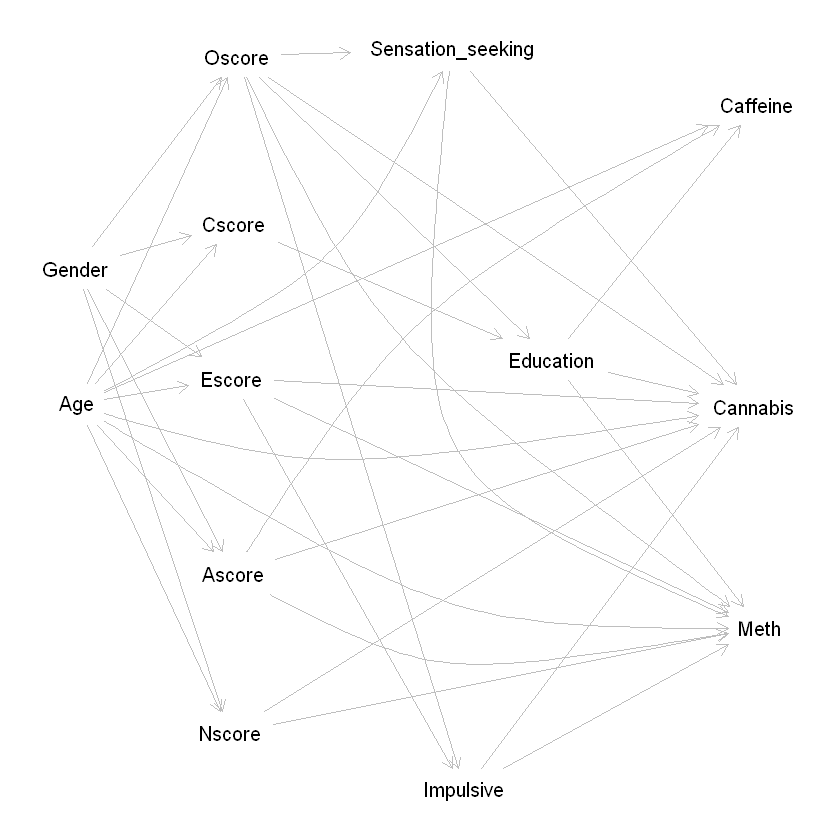

In [11]:
graph <- dagitty('dag {
bb="0,0,1,1"
Age [pos="0.140,0.493"]
Ascore [pos="0.268,0.602"]
Caffeine [pos="0.696,0.299"]
Cannabis [pos="0.694,0.494"]
Cscore [pos="0.269,0.376"]
Education [pos="0.528,0.464"]
Escore [pos="0.266,0.476"]
Gender [pos="0.139,0.405"]
Impulsive [pos="0.457,0.742"]
Meth [pos="0.698,0.637"]
Nscore [pos="0.265,0.705"]
Oscore [pos="0.271,0.268"]
Sensation_seeking [pos="0.447,0.264"]
Age -> Ascore
Age -> Caffeine
Age -> Cannabis [pos="0.332,0.543"]
Age -> Cscore
Age -> Escore
Age -> Meth [pos="0.450,0.644"]
Age -> Nscore
Age -> Oscore
Age -> Sensation_seeking [pos="0.366,0.404"]
Ascore -> Caffeine [pos="0.399,0.432"]
Ascore -> Cannabis
Ascore -> Meth [pos="0.429,0.676"]
Cscore -> Education
Education -> Caffeine
Education -> Cannabis
Education -> Meth
Escore -> Cannabis
Escore -> Impulsive
Escore -> Meth
Gender -> Ascore
Gender -> Cscore
Gender -> Escore
Gender -> Nscore
Gender -> Oscore
Impulsive -> Cannabis
Impulsive -> Meth
Nscore -> Cannabis
Nscore -> Meth
Oscore -> Cannabis
Oscore -> Education
Oscore -> Impulsive
Oscore -> Meth [pos="0.376,0.454"]
Oscore -> Sensation_seeking
Sensation_seeking -> Cannabis
Sensation_seeking -> Meth [pos="0.393,0.550"]
}')
plot(graph)

In [12]:
localTests( graph, sample.cov=M, sample.nobs=nrow(df) )

,estimate,p.value,2.5%,97.5%
"Age _||_ Edct | Cscr, Oscr",0.154064062,1.654290e-11,0.109655825,0.197879995
Age _||_ Gndr,-0.121966672,1.051249e-07,-0.166208468,-0.077243747
"Age _||_ Impl | Escr, Oscr",0.113308797,8.050409e-07,0.068487008,0.157680739
"Ascr _||_ Cscr | Age, Gndr",0.213656236,5.015096e-21,0.170135343,0.256430039
"Ascr _||_ Edct | Cscr, Oscr",0.029168190,2.058493e-01,-0.016025360,0.074242954
"Ascr _||_ Edct | Age, Gndr",0.043976820,5.638862e-02,-0.001197996,0.088972880
"Ascr _||_ Escr | Age, Gndr",0.151378259,3.729570e-11,0.106938009,0.195234935
"Ascr _||_ Impl | Escr, Oscr",0.180628154,2.399434e-15,0.136573238,0.224011336
"Ascr _||_ Impl | Age, Gndr",0.152453847,2.697959e-11,0.108026335,0.196294274
"Ascr _||_ Nscr | Age, Gndr",-0.233131911,7.216289e-25,-0.275512540,-0.189976666
